In [1]:
import pandas as pd 
import requests
import json
import time
import numpy as np
from pylab import mpl,plt
plt.style.use("seaborn")
mpl.rcParams['font.family']='serif'
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [2]:
# 获取永续合约价格
def get_perpetualprice(platform, symbol):
    if platform == 'huobi':
        now = int(time.time())
        start_time = now - 86400*300
        contract_code = "{}-usdt".format(symbol).upper()
        url = huobifuture_api_url + '/linear-swap-ex/market/history/kline?contract_code={}&period=1day&from={}&to={}'.format(
            contract_code, start_time, now)
        res = requests.get(url)
        resdict = json.loads(res.content.decode())
        close_price = [i['close'] for i in resdict['data']]
        high_price = [i['high'] for i in resdict['data']]
        low_price = [i['low'] for i in resdict['data']]
        open_price=[i['open'] for i in resdict['data']]
        return close_price,high_price,low_price,open_price

In [3]:
symbols=['btc','eth','link','eos','fil','ltc','dot','doge']
huobifuture_api_url="https://api.btcgateway.pro"
close,high,low,open=get_perpetualprice('huobi','doge')

In [4]:
df=pd.DataFrame()
df['close']=close
df['high']=high
df['low']=low
df['open']=open

In [5]:
N=2
df['HH']=df['high'].shift().rolling(N).max()
df['HC']=df['close'].shift().rolling(N).max()
df['LC']=df['close'].shift().rolling(N).min()
df['LL']=df['low'].shift().rolling(N).min()
df.fillna(0,inplace=True)

In [6]:
df

,close,high,low,open,HH,HC,LC,LL
0,0.008171,0.008336,0.007854,0.007886,0.000000,0.000000,0.000000,0.000000
1,0.009560,0.010143,0.008084,0.008221,0.000000,0.000000,0.000000,0.000000
2,0.008701,0.009884,0.008634,0.009536,0.010143,0.009560,0.008171,0.007854
3,0.009419,0.009582,0.008347,0.008749,0.010143,0.009560,0.008701,0.008084
4,0.009178,0.009487,0.008802,0.009429,0.009884,0.009419,0.008701,0.008347
5,0.009154,0.009404,0.008897,0.009174,0.009582,0.009419,0.009178,0.008347
6,0.009231,0.009723,0.008967,0.009159,0.009487,0.009178,0.009154,0.008802
7,0.008685,0.009280,0.008583,0.009247,0.009723,0.009231,0.009154,0.008897
8,0.008325,0.009115,0.008247,0.008687,0.009723,0.009231,0.008685,0.008583
9,0.008554,0.008750,0.007530,0.008303,0.009280,0.008685,0.008325,0.008247


In [7]:
df['a']=df['HH']-df['LC']
df['b']=df['HC']-df['LL']
df['range']=df[['a','b']].max(axis=1)
df['upper_']=df['open']+0.3*df['range']
df['low_']=df['open']-0.9*df['range']

In [8]:
df['upper_']=df['upper_'].apply(lambda x:float(x))
df['low_']=df['low_'].apply(lambda x:float(x))

In [9]:
df['position_open']=np.where(df['close']>df['upper_'],1,0)
df['position_close']=np.where(df['close']<df['low_'],-1,0)

In [10]:
df.drop(['a','b'],axis=1,inplace=True)

<AxesSubplot:>

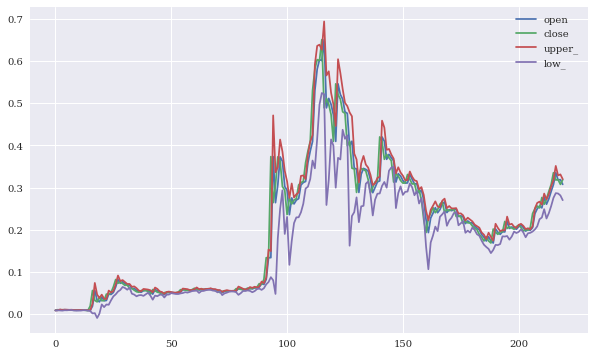

In [11]:
df[['open','close','upper_','low_']].plot(figsize=(10,6))

In [12]:
open=df['position_open'].values.tolist()
close=df['position_close'].values.tolist()

In [13]:
#双向交易
flag=0
direction=[]
for i in range(len(open)):
    if flag==0:
        if open[i]==1 and close[i]==0:
            direction.append(1)
            flag=1
        elif open[i]==0 and close[i]==-1:
            direction.append(-1)
            flag=-1
        else:
            direction.append(0)
    elif flag==1:
        if open[i]==1 and close[i]==0: 
            direction.append(1)
        elif open[i]==0 and close[i]==-1:
            direction.append(-1)
            flag=-1
        else:
            direction.append(1)
    elif flag==-1:
        if open[i]==1 and close[i]==0:
            direction.append(1)
            flag=1
        elif open[i]==0 and close[i]==-1:
            direction.append(-1)
        else:
            direction.append(-1)

In [14]:
df['direction']=np.array(direction)

In [17]:
df['return']=np.log(df['close']/df['close'].shift())
df['Strategy']=df['return']*df['direction'].shift()*2

<AxesSubplot:>

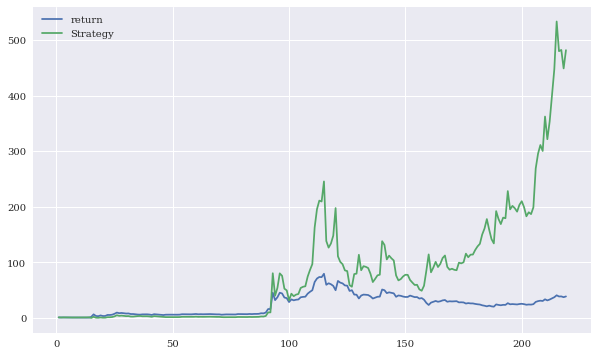

In [18]:
df[['return','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))